## Sokolov Alexander Titanic dz

In [63]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [64]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [65]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. Посмотрим количество пропущенных значений**

In [66]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Фичи', fontsize=15)
    plt.ylabel('Процент пропущенных значений', fontsize=15)
    plt.title('Процент отсутствующих данных по характеристикам', fontsize=15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


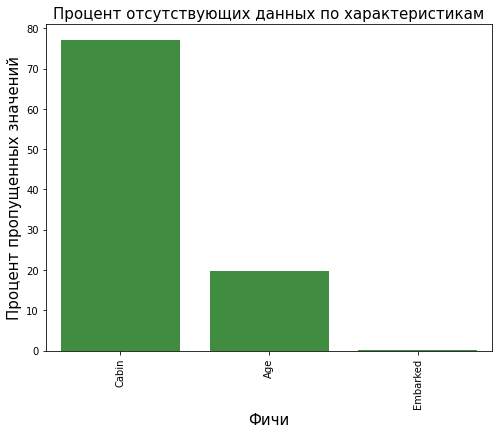

In [67]:
missingdata(train_df)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


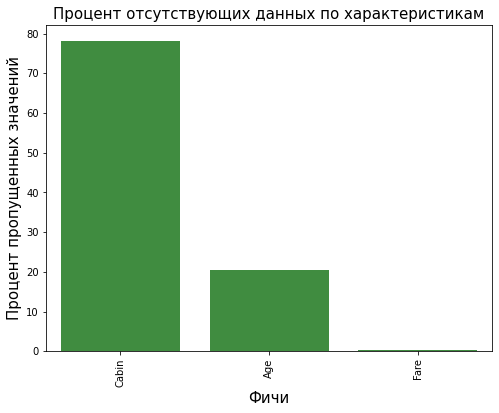

In [68]:
missingdata(test_df)

**2.Заполним пропущенные значения средними значениями + уберем лишнюю инфу для дальнейшей обработки данных**

In [69]:
test_df['Age'].mean()

30.272590361445783

In [70]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [71]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [72]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

In [73]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)


In [74]:
print('check the nan value in train data')
print(train_df.isnull().sum())
print('___'*30)
print('check the nan value in test data')
print(test_df.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
__________________________________________________________________________________________
check the nan value in test data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [75]:
all_data=[train_df,test_df]

In [76]:
# Сделаем фичу семьи
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [77]:
import re
# Определим функцию для извлечения заголовков из имен пассажиров с отсутствующими данными по характеристикам
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # Если заголовок существует, извлечем и вернем
    if title_search:
        return title_search.group(1)
    return ""
# Создадим новый заголовок функции, содержащий заголовки имен пассажиров
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Сгруппируем все необычные заголовки в одну группу "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [79]:
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [80]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [83]:
# сделаем копии датасетов
traindf=train_df
testdf=test_df

In [84]:
all_dat=[traindf,testdf]

In [85]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)


In [86]:
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [87]:
testdf.head(2)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,892,3,male,0,0,Q,1,Mr,Adult,Low_fare
1,893,3,female,1,0,S,2,Mrs,Elder,Low_fare


In [88]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [89]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [90]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,893,3,1,0,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,895,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,896,3,1,1,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


# Данные готовы для обработки, теперь разделим выборку и проведем анализ 5 моделей

In [91]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 22), (268, 22), (623,), (268,))

## Линейная регрессия

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 82.46
The cross validated score for Logistic REgression is: 81.93


Text(0.5, 1.05, 'Confusion_matrix')

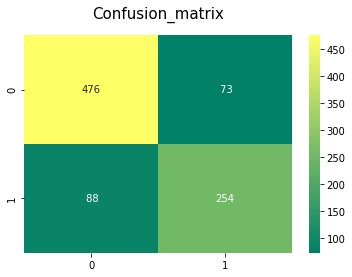

In [92]:

from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Random forest

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 82.46
The cross validated score for Random Forest Classifier is: 83.73


Text(0.5, 1.05, 'Confusion_matrix')

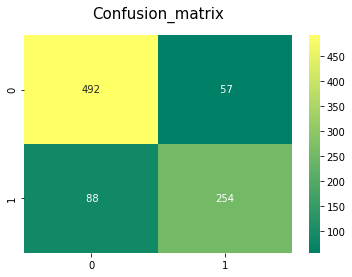

In [93]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Knn

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 81.34
The cross validated score for K Nearest Neighbors Classifier is: 81.26


Text(0.5, 1.05, 'Confusion_matrix')

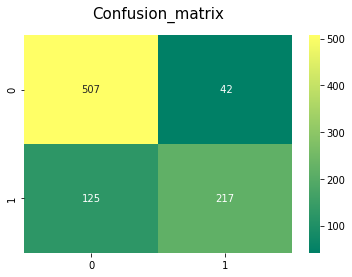

In [94]:

from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Naive bayes

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 79.48
The cross validated score for Gaussian Naive Bayes classifier is: 79.8


Text(0.5, 1.05, 'Confusion_matrix')

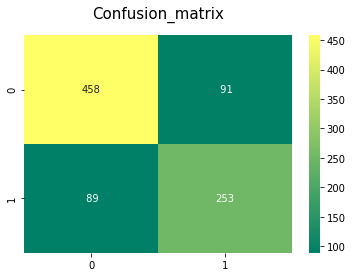

In [95]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Decision Tree

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 78.36
The cross validated score for Decision Tree classifier is: 82.49


Text(0.5, 1.05, 'Confusion_matrix')

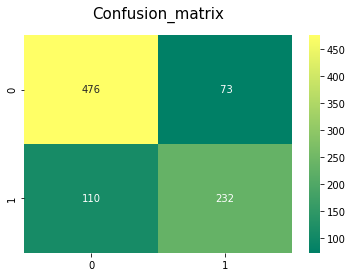

In [96]:

from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [97]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [result_knn.mean(), result_lr.mean(), 
              result_rm.mean(),
              result_gbc.mean(), result_tree.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
2,Random Forest,0.837303
4,Decision Tree,0.824944
3,Naive Bayes,0.820474
1,Logistic Regression,0.819301
0,KNN,0.812597


# Как итог - наилучший результат показал Random Forest

+ ответы на вопросы с лекции

Гипотеза 1: чем выше социальный статус (PClass),
тем больше вероятность спасения человека

In [98]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [99]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Гипотеза 2: человек будет спасать своих родственников при крушении

<AxesSubplot:xlabel='SibSp', ylabel='count'>

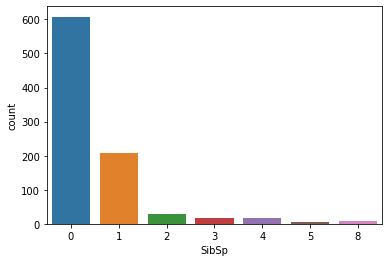

In [100]:
sns.countplot(x='SibSp',data=train_df)